# 20: VALIDAR EL MODELO (CONJUNTO ENTRENAMIENTO Y TESTING)

Es posible que el modelo que diseñamos actue muy bien con los datos que se han usado para crearlo pero muy mal con otros datosque están fuera del conjunto de entrenamineto. Este fenómeno se conoce como OVERFITTING. Para evitar esto, se dividen los datos en conjunto de entrenamiento y conjunto de testing.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
# Cargamos los datos (en este caso lo haremos de otro modo)

datos = pd.read_csv('../../Recursos_curso/datasets/ads/Advertising.csv') # cada ../ significa ir un nivel atras en directorio

In [4]:
datos.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Generar el conjunto de entrenamiento - testing (uno de los métodos que hemos estudiado antes)

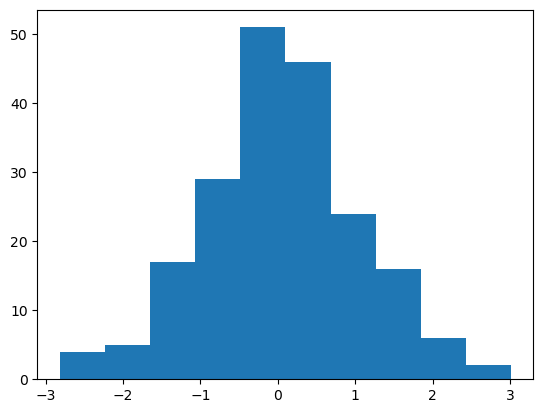

In [10]:
# Generar números aleatorio con distribución aleatoria con media 0 y desviación estándar 1

np.random.seed(39441890)
aleatorios = np.random.randn(len(datos))

plt.hist(aleatorios)
%matplotlib inline

In [12]:
# Generar una matriz de True o False para discriminar las posiciones

apoyo = (aleatorios < 0.8) # deja como True aquellas posiciones que tengan un número menor a 0.8 (aprox el 80%)
apoyo

array([ True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True, False, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,

In [13]:
# Generar el conjunto de testing y el de entrenamiento a partir de estos valores aleatorios

entrenamiento = datos[apoyo]
testing = datos[~apoyo] # Hace la inversa de la línea anterior

In [14]:
entrenamiento.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8


In [15]:
testing.head()

,TV,Radio,Newspaper,Sales
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
22,13.2,15.9,49.6,5.6
25,262.9,3.5,19.5,12.0
26,142.9,29.3,12.6,15.0


In [17]:
print(f'El conjunto de entrenamiento tiene el {100 * len(entrenamiento) / len(datos)}% de los datos')
print(f'El conjunto de testing tiene el {100 * len(testing) / len(datos)}% de los datos')

El conjunto de entrenamiento tiene el 78.5% de los datos
El conjunto de testing tiene el 21.5% de los datos


### Crear el modelo a partir del conjunto de entrenamiento

In [18]:
regresion_lineal = smf.ols(formula = 'Sales ~ TV + Radio', data = entrenamiento).fit()

In [19]:
regresion_lineal.params

Intercept    2.953261
TV           0.045284
Radio        0.188135
dtype: float64

MODELO

Sales = 2.953261 + (0.045284 * TV) + (0.188135 * Radio)

### Validar el modelo con el conjunto de Testing

In [23]:
# Predecir el valor de Sales en el conjunto de testing

testing['Predicción'] = regresion_lineal.predict(testing[['TV', 'Radio']])
testing.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19568\4260810458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['Predicción'] = regresion_lineal.predict(testing[['TV', 'Radio']])


,TV,Radio,Newspaper,Sales,Predicción
2,17.2,45.9,69.3,9.3,12.367522
3,151.5,41.3,58.5,18.5,17.583727
22,13.2,15.9,49.6,5.6,6.542348
25,262.9,3.5,19.5,12.0,15.516862
26,142.9,29.3,12.6,15.0,14.936670


In [24]:
# Comprobar los estadísticos del modelo

r2 = regresion_lineal.rsquared
ssd = sum((testing['Sales'] - testing['Predicción']) ** 2)
rse = np.sqrt(ssd / (len(testing) - 2 - 1)) # el 2 es porque el modelo utiliza dos variables
error = 100 * rse / np.mean(testing['Sales'])

In [25]:
print(f'El parametro R2 del modelo es: {r2}')
print(f'El parametro SSD del modelo es: {ssd}')
print(f'El parametro RSE del modelo es: {rse}')
print(f'El parametro Error del modelo es: {error}%')

El parametro R2 del modelo es: 0.9057962957982458
El parametro SSD del modelo es: 168.85037823580652
El parametro RSE del modelo es: 2.0545703823172285
El parametro Error del modelo es: 14.085861996116202%


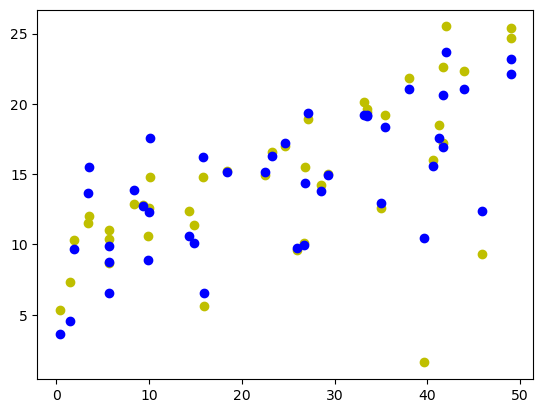

In [36]:
# Visualizar el modelo mediante un plot

plt.plot(testing['Radio'], testing['Sales'], 'yo')
plt.plot(testing['Radio'], testing['Predicción'], 'bo')
%matplotlib inline